In [5]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

# Carrega o modelo desejado

In [6]:
from tensorflow.keras.models import load_model # type: ignore

model = load_model('modelo_base.h5')

## Gera um relatório do modelo

### Métricas do relatório:

- Precision
- Recall
- f1-score

- Overall accurcy
- Macro avg
- Weighted avg


In [9]:
"""
Script simples para avaliar modelo otimizado
"""

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar gerador de dados de validação
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    '../processed_data/dataset_1_split/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Obter nomes das classes
class_names = list(validation_generator.class_indices.keys())

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Relatório de classificação
print(classification_report(y_true, y_pred, target_names=class_names))

Found 411 images belonging to 16 classes.


/home/adame/Documents/UTFPR/processamento_digital_imagens/projeto_final_pdi_correto/cnn_food/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 741ms/step
                   precision    recall  f1-score   support

           Alface       1.00      0.33      0.50        24
        Almondega       0.00      0.00      0.00        23
            Arroz       0.19      0.58      0.29        24
      BatataFrita       0.62      0.54      0.58        24
        Beterraba       0.49      0.95      0.65        22
  BifeBovinoChapa       0.76      0.50      0.60        26
CarneBovinaPanela       0.48      0.78      0.59        40
          Cenoura       1.00      0.23      0.37        31
    FeijaoCarioca       0.80      0.16      0.27        25
         Macarrao       0.52      0.96      0.68        27
         Maionese       0.43      0.52      0.47        23
      PeitoFrango       0.86      0.75      0.80        24
       PureBatata       0.56      0.64      0.60        28
  StrogonoffCarne       0.00      0.00      0.00        22
 StrogonoffFrango       1.00      0.57      0.73        21
           To

/home/adame/Documents/UTFPR/processamento_digital_imagens/projeto_final_pdi_correto/cnn_food/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/adame/Documents/UTFPR/processamento_digital_imagens/projeto_final_pdi_correto/cnn_food/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/adame/Documents/UTFPR/processamento_digital_imagens/projeto_final_pdi_correto/cnn_food/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricW

# Gera a matriz de confusão do modelo

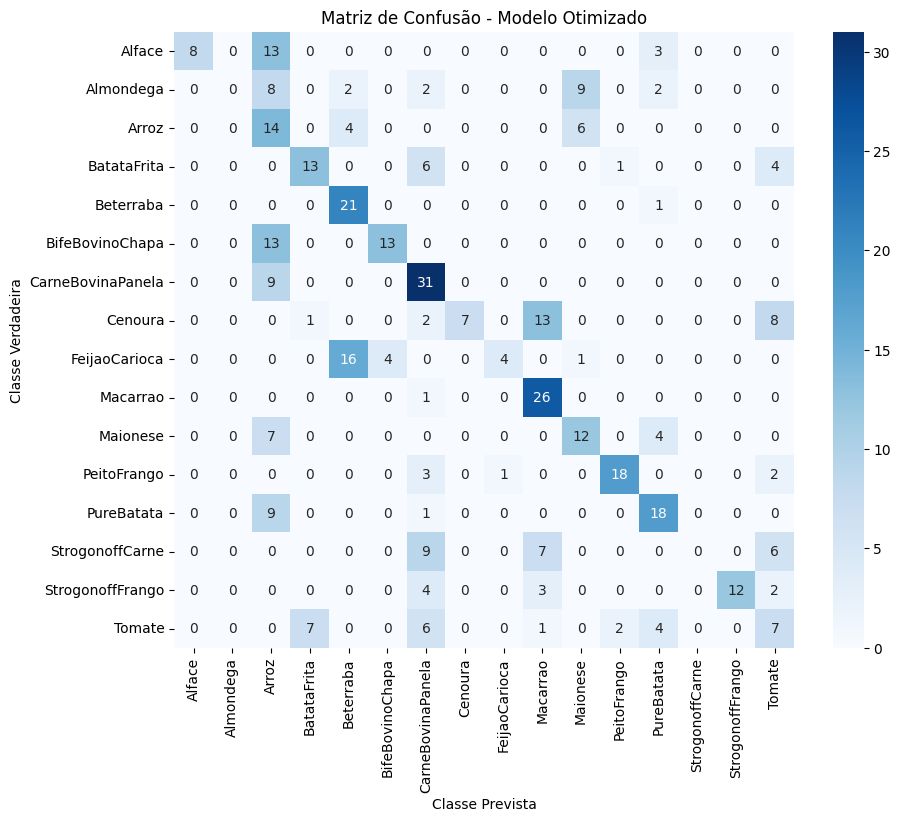

In [8]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão - Modelo Otimizado')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Prevista')
plt.show()
